## Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np # conda install numpy
import tensorflow as tf 
import matplotlib.pyplot as plt # conda install matplotlib
import pandas as pd # conda install pandas
import seaborn as sns # conda install seaborn

from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## Data Loading

In [4]:
data = pd.read_csv('/content/winequality-red.csv')
data.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides'
                , 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## EDA and Exploring features

In [5]:
data.shape

(1599, 12)

In [6]:
#Check datatypes of each columns
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
#Check for null values
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We can see that there are no null values in any column.

In [9]:
#Check distinct values in quality column
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [11]:
#Check for total number of values for each quality rating
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
#Check correlation of every feature w.r.t the quality of the wine.

data.corr()['quality']

fixed_acidity           0.124052
volatile_acidity       -0.390558
citric_acid             0.226373
residual_sugar          0.013732
chlorides              -0.128907
free_sulfur_dioxide    -0.050656
total_sulfur_dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<h3>Heat Map of Correlation Matrix</h3>

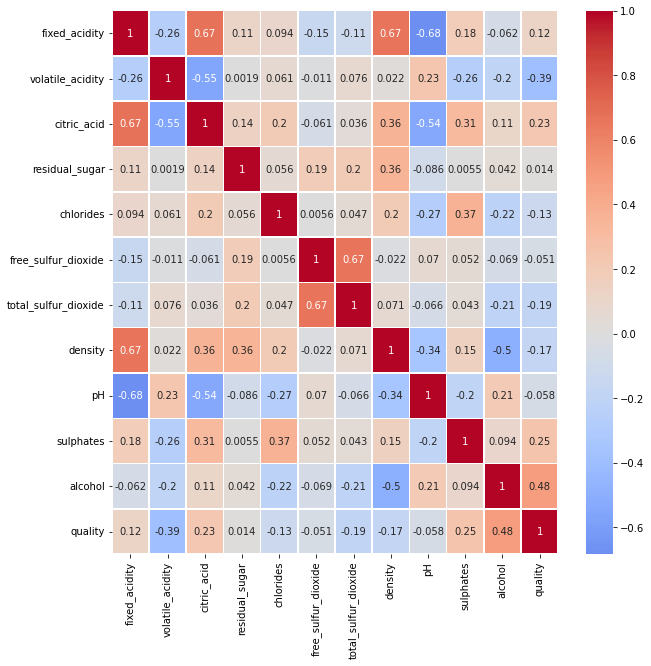

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

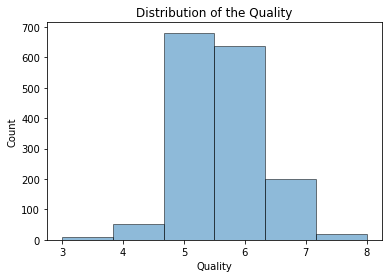

In [14]:
plt.hist(data.quality,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

The above plot shows the distribution of the quality of the wine in the dataset, and represents that most of the wine is of average quality i.e. quality ranging from 5 to 7 .

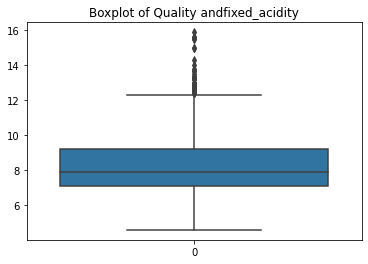

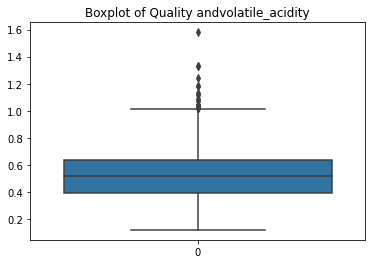

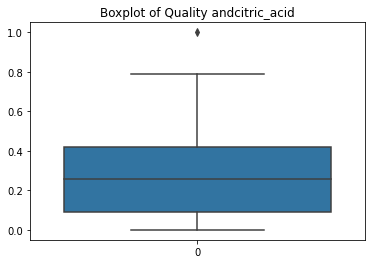

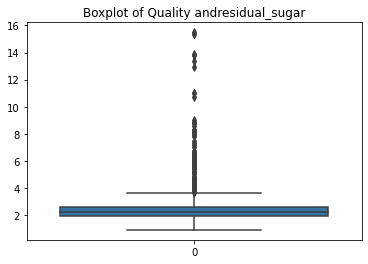

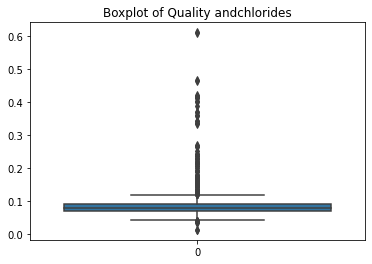

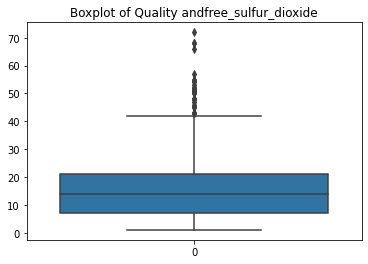

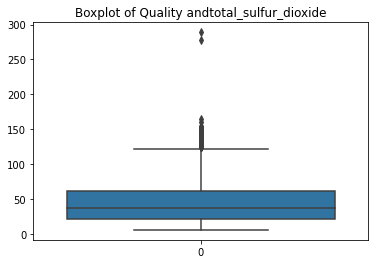

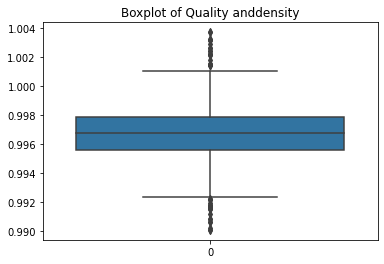

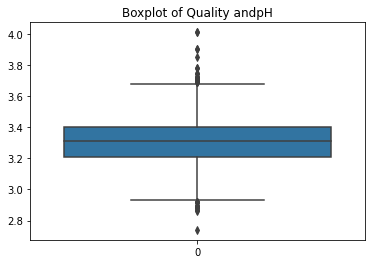

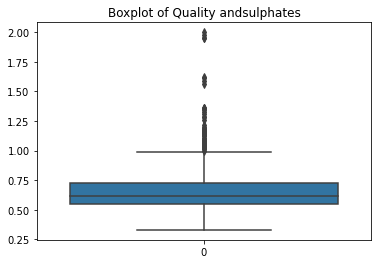

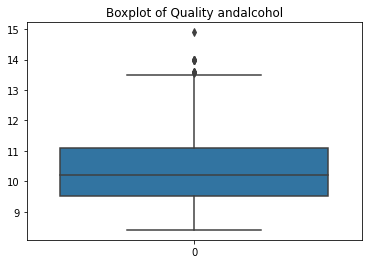

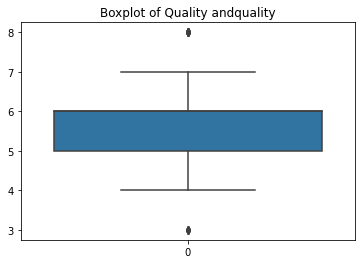

In [46]:
for idx,i in enumerate(data.columns):
  sns.boxplot(data=data[i])
  plt.title("Boxplot of Quality and"+ data.columns[idx]) 
  plt.show()

Removing Outliers

In [47]:
for idx,i in enumerate(data.columns):
  data[data.columns[idx]] = data[data.columns[idx]].map(lambda i: np.log(i) if i > 0 else 0)


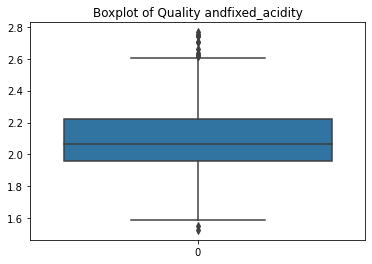

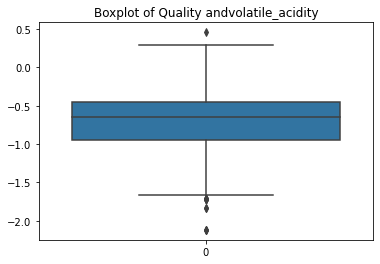

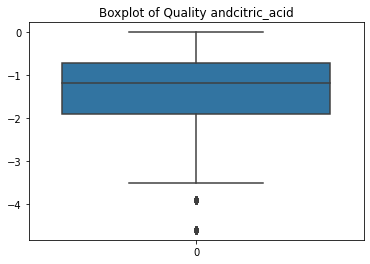

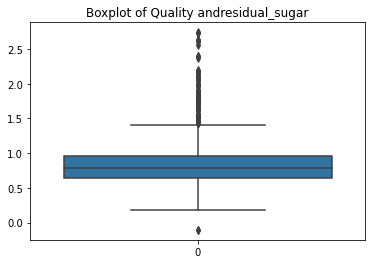

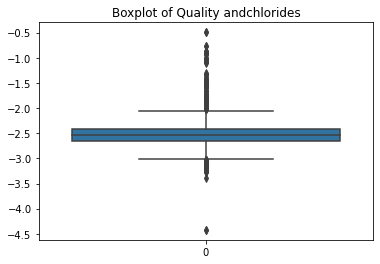

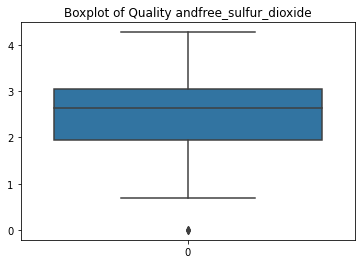

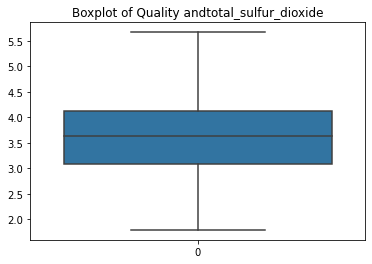

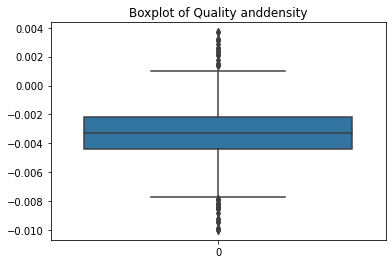

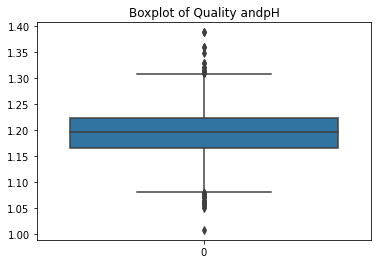

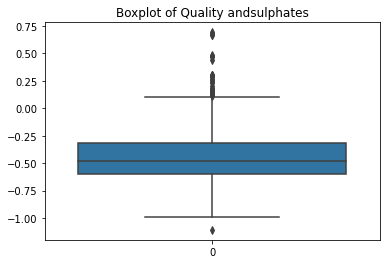

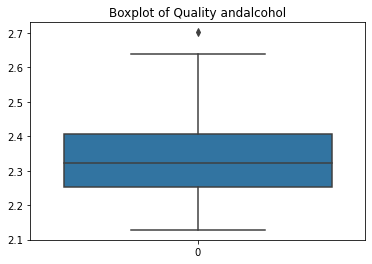

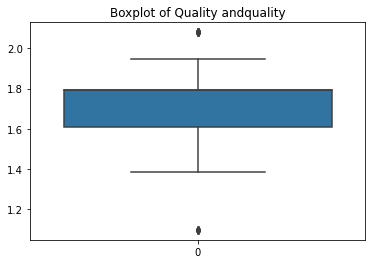

In [49]:
for idx,i in enumerate(data.columns):
  sns.boxplot(data=data[i])
  plt.title("Boxplot of Quality and"+ data.columns[idx]) 
  plt.show()

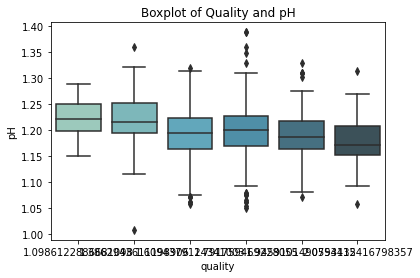

In [50]:
sns.boxplot(x='quality',y='pH',data=data,palette='GnBu_d')
plt.title("Boxplot of Quality and pH")
plt.show()

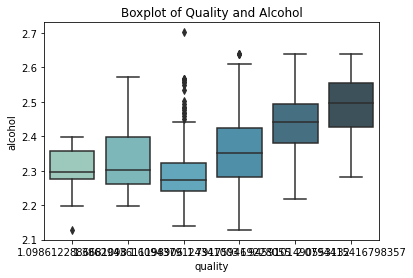

In [51]:
ax = sns.boxplot(x='quality',y='alcohol',data=data,palette='GnBu_d')
plt.title("Boxplot of Quality and Alcohol")
plt.show()

The above plot shows the increase in the quality of wine with the increase in alcohol. The quality of the wine is directly related to the amount of alcohol in the wine. More the alcohol in the wine better will be the quality. Whereas it shows slight decrease in pH scale with good quality.

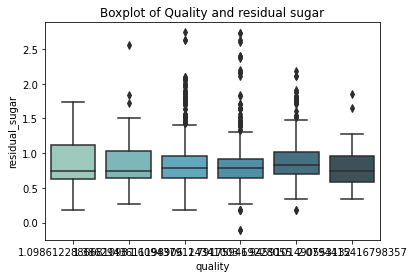

In [52]:
sns.boxplot(x="quality",y="residual_sugar",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and residual sugar")
plt.show()

Not much effect of sugar residual on quality.

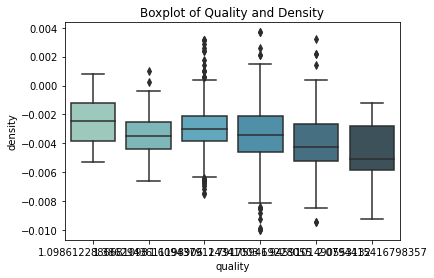

In [53]:
sns.boxplot(x="quality",y="density",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Density")
plt.show()

Lower the density of wine better will be the quality of the wine. From the above boxplot we acn visualize that the quality of wine increases with decrease in density.

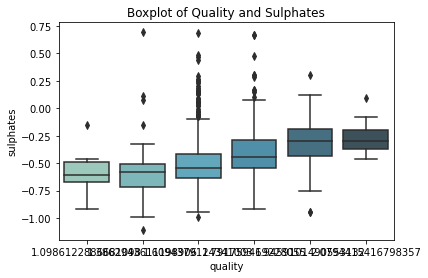

In [54]:
sns.boxplot(x="quality",y="sulphates",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Sulphates")
plt.show()

The above plot represents that the quality of alcohol increases with the increase in the amount of sulphates in the wine.

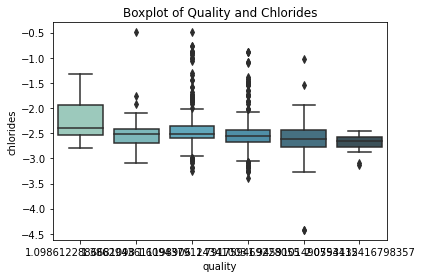

In [55]:
sns.boxplot(x="quality",y="chlorides",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Chlorides")
plt.show()

Not much effect in the quality of wine for a particular amount of chlorides mixed in them.

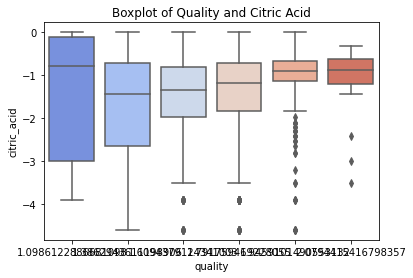

In [56]:
sns.boxplot(x="quality",y="citric_acid",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Citric Acid")
plt.show()

The quality of the wine increses with increase in the amount of citric acid in the wine.

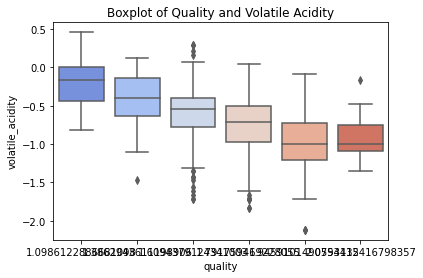

In [57]:
sns.boxplot(x="quality",y="volatile_acidity",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Volatile Acidity")
plt.show()

The quality of wine increases with the decrease in the amount of volatile acids.

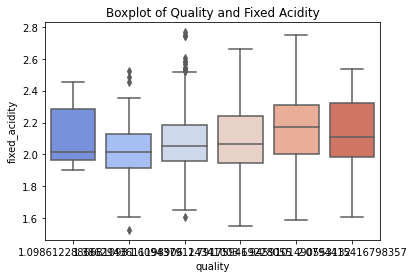

In [58]:
sns.boxplot(x="quality",y="fixed_acidity",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Fixed Acidity")
plt.show()

There is not much effect of fixed acidity on the quality of the wine just a slight increase.

## Data preprocessing

In [59]:
features = data.drop(['quality'] , axis = 1)
target = data['quality']

we will try the random forrest to analyse the feature importance

In [60]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=12)

data = pd.get_dummies(data)
model.fit(features, data.quality)
display(model.feature_importances_)
feat = data.columns

imp = model.feature_importances_
indices = np.argsort(imp)[:]

array([0.05043296, 0.14637423, 0.04330804, 0.05718016, 0.06609348,
       0.04281109, 0.08150353, 0.05215828, 0.05651911, 0.13296219,
       0.27065693])

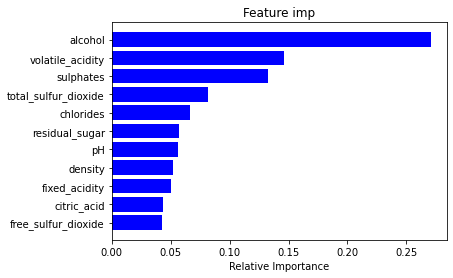

In [61]:
plt.title('Feature imp')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feat[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The top features to affect the quality of the wine are Alcohol,Sulphates, and volatile acidity and the least important features such as fixed acidity,fee sulpher dioxide and citric acid, so the least important can be removed.

In [62]:
del features['fixed_acidity']
del features['free_sulfur_dioxide']
del features['citric_acid']
features

,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.356675,0.641854,-2.577022,3.526361,-0.002202,1.255616,-0.579818,2.240710
1,-0.127833,0.955511,-2.322788,4.204693,-0.003205,1.163151,-0.385662,2.282382
2,-0.274437,0.832909,-2.385967,3.988984,-0.003005,1.181727,-0.430783,2.282382
3,-1.272966,0.641854,-2.590267,4.094345,-0.002002,1.150572,-0.544727,2.282382
4,-0.356675,0.641854,-2.577022,3.526361,-0.002202,1.255616,-0.579818,2.240710
...,...,...,...,...,...,...,...,...
1594,-0.510826,0.693147,-2.407946,3.784190,-0.005113,1.238374,-0.544727,2.351375
1595,-0.597837,0.788457,-2.780621,3.931826,-0.004892,1.258461,-0.274437,2.415914
1596,-0.673345,0.832909,-2.577022,3.688879,-0.004269,1.229641,-0.287682,2.397895
1597,-0.438505,0.693147,-2.590267,3.784190,-0.004540,1.272566,-0.342490,2.322388


In [63]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
y = le.fit_transform(data.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))

In [64]:
x_train, x_test, y_train, y_test = train_test_split(features,y, test_size = 0.2, random_state = 0)

In [65]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)

## Tensorflow DNNs

In [66]:
def create_feature_column():
    feat_volatile_acidity = tf.feature_column.numeric_column('volatile_acidity')
    feat_residual_sugar = tf.feature_column.numeric_column('residual_sugar')
    feat_chlorides = tf.feature_column.numeric_column('chlorides')
    feat_total_sulfur_dioxide  = tf.feature_column.numeric_column('total_sulfur_dioxide')
    feat_density              = tf.feature_column.numeric_column('density')
    feat_pH  = tf.feature_column.numeric_column('pH')
    feat_sulphates  = tf.feature_column.numeric_column('sulphates')
    feat_alcohol  = tf.feature_column.numeric_column('alcohol')


    feature_column = [ feat_volatile_acidity,feat_residual_sugar, feat_chlorides, 
                       feat_total_sulfur_dioxide,feat_density,feat_pH,feat_sulphates,feat_alcohol] 

    return feature_column
feature_column = create_feature_column()

In [67]:
def traineval(x_train, y_train, training=False, batch_size=128):
    """An input function for training or evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(x_train), y_train))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)


In [68]:
my_feature_columns = []
for key in data.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

In [69]:
dnn = tf.estimator.DNNClassifier(hidden_units = [20,20,20],
                                      feature_columns = feature_column,
                                      n_classes= 6,
                                      activation_fn=tf.nn.relu,
                                      dropout=None)

In [70]:
dnn.train(
    input_fn= lambda: traineval(x_train, y_train , training=True), steps=10000)

In [71]:
eval_result = dnn.evaluate(input_fn=lambda: traineval(x_test, y_test, training=False))
predictions = dnn.predict(input_fn=lambda: traineval(x_test, y_test, training=False))

In [72]:
print(eval_result)

{'accuracy': 0.521875, 'average_loss': 1.0843542, 'loss': 1.0857548, 'global_step': 10000}


In [73]:
nn = tf.keras.models.Sequential(layers = None , name = None)
nn.add(tf.keras.layers.Input(shape = 8,))
nn.add(tf.keras.layers.Dense(units = 300 , activation = "relu" ))
nn.add(tf.keras.layers.Dense(units = 200 , activation = "relu" ))
nn.add(tf.keras.layers.Dense(units = 150 , activation = "relu" ))
nn.add(tf.keras.layers.Dense(units = 100 , activation = "relu" ))
nn.add(tf.keras.layers.Dense(units = 100 , activation = "relu" ))
nn.add(tf.keras.layers.Dense(units = 80 , activation = "relu" ))
nn.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))
nn.summary()
nn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])
history = nn.fit(x_train, y_train_cat,  batch_size= 32, epochs = 150 , validation_data = (x_test,y_test_cat))



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 300)               2700      
                                                                 
 dense_8 (Dense)             (None, 200)               60200     
                                                                 
 dense_9 (Dense)             (None, 150)               30150     
                                                                 
 dense_10 (Dense)            (None, 100)               15100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 80)                8080      
                                                                 
 dense_13 (Dense)            (None, 6)                

<h2>Model Evaluation</h2>

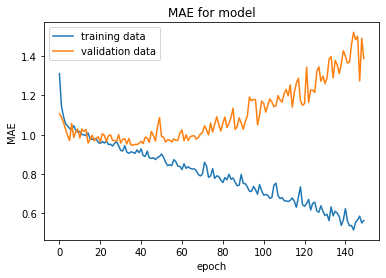

In [74]:
#Here we plot the loss vs Validation loss using a line graph.
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

*Here* we are plotting the training accuracy vs validation accuracy. 

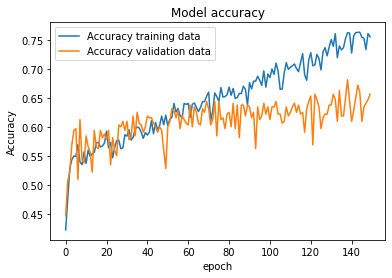

In [75]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

<h2>CONCLUSION</h2>

We could see the loss is high in the beginning. However, it descreases with the iterations. The training data has less loss when compared to the validation data. Also, The model is not properly trained with few resons like small validation set, biased data because the model has test time more robust and can lead to higher testing accuracies. And the plot is showing us that it is giving better acuuracy in Validation testing.

Keras accuracy is higher than the DNN classifier on average. The loss also lower in Keras compared to DNN classifier.
